In [174]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# For logistic growth we can define a sigmoid function
# Sigmoid function, f(-6) = 0; f(0) = 0.5;  f(6) = 1.0;
# Sigmoid / logistic growth would be a common cash flow profile
# Future options to add would be 'step function,' 'linear growth,' 'exponential growth,' etc.
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Define a quarterly implementation of logistic growth / sigmoid based on delay in years, max $ amount, and the time to ramp up
# All values in quarters except the 'max_amt' which is in dollars($M USD)
# max_amt is the 'carrying capacity' of the sigmoid function, usually known as 'k' in academic formulas
def sigmoid_qtr(delay_qtrs, max_amt, scale_up_qtrs, tot_qtrs=12):
    mylist = []
    if scale_up_qtrs < 2: 
        print('the total number of quarters must be at least one')
    # -3 corresponds to 5% of max value, and 3 corresponds to 95% of max value, going to use those values to define function.
    sigmoid_start = -3
    sigmoid_last = 3
    quarterly_x = (sigmoid_last - sigmoid_start) / scale_up_qtrs
    # print(f'quarterly_x = {quarterly_x}')
    for i in range(0, tot_qtrs):
        if i < delay_qtrs:
            mylist.append(0)
        else: 
            x_val = sigmoid_start + quarterly_x*(i - delay_qtrs)
            mylist.append(max_amt * sigmoid(x_val))
    return mylist

# Let's try a test case with some benefits with a max of $5M that start in 3 quarters, fully realized in 6 quarters 
delay_qtrs = 3
max_amt = 5
scale_up_qtrs = 7
test = sigmoid_qtr(delay, scale_up_qtrs, max_qtrs)



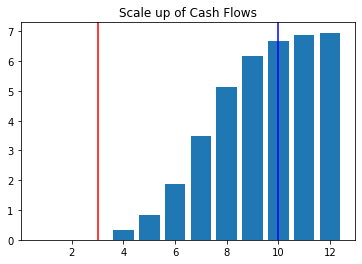

In [178]:
# Red line is the number of delay quarters, when the function kicks in
# Blue line is the end of scale up when you are getting close to max benefits
def plotter(vals, delay_qtrs, scale_up_qtrs):
    labels = np.arange(1, len(test)+1)
    plt.bar(labels, vals)
    plt.axvline(x=delay_qtrs, color = 'r')
    plt.title('Scale up of Cash Flows')
    plt.axvline(x=(delay_qtrs + scale_up_qtrs), color = 'b')
    plt.show;
    
plotter(test, delay_qtrs, scale_up_qtrs)

In [188]:
def f(x, y):
    flow = sigmoid_qtr(x, scale_up_qtrs, y)
    plotter(flow, x, scale_up_qtrs)

# Need to get this working for negative numbers.  Cash flow profiles for costs / investments will be negative numbers.
# Just need to review math of the above functions to make sure it works for negative numbers.
# Turning off continuous update here... 
interact(f, x=widgets.IntSlider(min=0, max=8, step=1, value=2, description='Qtr Delay', continuous_update=False), y=widgets.FloatSlider(min=0, max=30, step=0.5, value=4, description='Max Val', continuous_update=False));

interactive(children=(IntSlider(value=2, continuous_update=False, description='Qtr Delay', max=8), FloatSlider…

In [189]:
## Start building out a dataframe for project financial parameters and 12 months of cash flows
## Cash flows can be populated with the growth curves above

row_titles = ['visibility', 'growth', 'gamechangers']
column_titles = ['internal_fte', 'external_spend', 'max_benefit', 'profile', 'discount_rate']
d = pd.DataFrame(0, index=row_titles, columns=column_titles)

In [190]:
years_in_model = 3
quarters = (list(range(years_in_model * 4)))
quarters = [q + 1 for q in quarters]

In [191]:
a = np.zeros((len(row_titles),len(quarters)))
cost_benefit = pd.DataFrame(a, index = row_titles, columns=quarters)

In [193]:
# so once we estimate the benefits and the costs, we can populate the quarterly cash flows into a dataframe
# The three major categories of projects are visibility (R2K, etc.), growth (batch perf., etc.), gamechangers (proteinview, etc.)
comb = pd.concat([d, cost_benefit], axis=1, sort=False)
comb

# Once we phase in cash flows, we can discount them back with an Net Present Value (NPV) using the discount rate.

,internal_fte,external_spend,max_benefit,profile,discount_rate,1,2,3,4,5,6,7,8,9,10,11,12
visibility,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
growth,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gamechangers,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
### To iterate over the rows to replace the cash flows in the data frame for a given investment area.
adder = 1
for key, value in cost_benefit.iteritems(): 
    value = value + adder
    adder += 1
    print(value) 
    print() 

visibility      1.0
growth          1.0
gamechangers    1.0
Name: 1, dtype: float64

visibility      2.0
growth          2.0
gamechangers    2.0
Name: 2, dtype: float64

visibility      3.0
growth          3.0
gamechangers    3.0
Name: 3, dtype: float64

visibility      4.0
growth          4.0
gamechangers    4.0
Name: 4, dtype: float64

visibility      5.0
growth          5.0
gamechangers    5.0
Name: 5, dtype: float64

visibility      6.0
growth          6.0
gamechangers    6.0
Name: 6, dtype: float64

visibility      7.0
growth          7.0
gamechangers    7.0
Name: 7, dtype: float64

visibility      8.0
growth          8.0
gamechangers    8.0
Name: 8, dtype: float64

visibility      9.0
growth          9.0
gamechangers    9.0
Name: 9, dtype: float64

visibility      10.0
growth          10.0
gamechangers    10.0
Name: 10, dtype: float64

visibility      11.0
growth          11.0
gamechangers    11.0
Name: 11, dtype: float64

visibility      12.0
growth          12.0
gamechangers   